In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df4 = pd.read_csv('201803-fordgobike-tripdata.csv')

In [3]:
df1=pd.read_csv('201807-fordgobike-tripdata.csv')

In [4]:
df2=pd.read_csv('201811-fordgobike-tripdata.csv')

In [5]:
df3=pd.read_csv('201812-fordgobike-tripdata.csv')

In [6]:
frames = [df4, df1, df2, df3]
df= pd.concat(frames)

In [7]:
df.shape

(576102, 16)

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


In [9]:
df['duration_sec'].mean()

834.4304272507298

Text(0.5, 1.0, 'Plot')

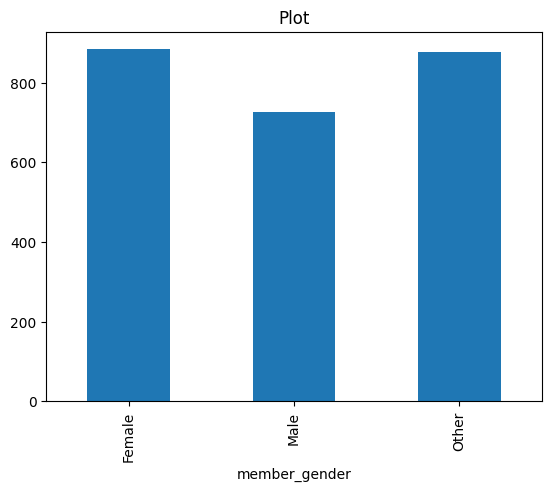

In [10]:
df.groupby('member_gender')['duration_sec'].mean().plot.bar()
plt.title('Plot')

In [11]:
grp = df.groupby('member_gender')

In [12]:
grp['duration_sec'].mean()

member_gender
Female    883.294750
Male      725.502590
Other     875.987365
Name: duration_sec, dtype: float64

In [13]:
df = pd.DataFrame(grp['duration_sec'].mean())

In [14]:
df

,duration_sec
member_gender,
Female,883.294750
Male,725.502590
Other,875.987365


<Axes: xlabel='member_gender', ylabel='duration_sec'>

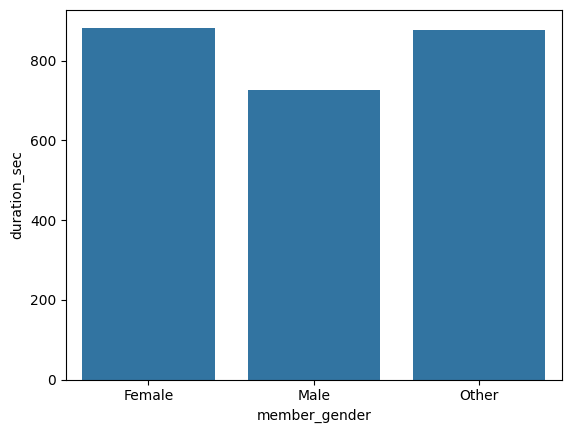

In [15]:
sns.barplot(x='member_gender',y='duration_sec',data=df)

<Axes: xlabel='duration_sec', ylabel='Count'>

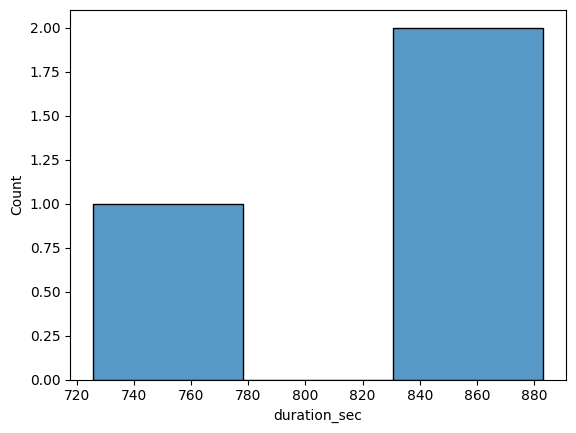

In [16]:
sns.histplot(x='duration_sec',data=df)

<Axes: xlabel='duration_sec'>

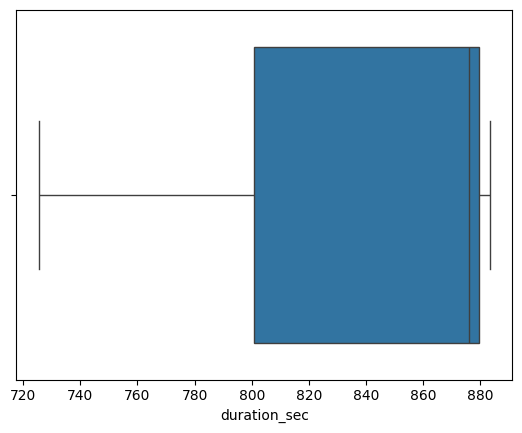

In [17]:
sns.boxplot(x='duration_sec',data=df)

In [18]:
df.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    883.294750
Male      725.502590
Other     875.987365
Name: duration_sec, dtype: float64

In [19]:
df.head()

,duration_sec
member_gender,
Female,883.294750
Male,725.502590
Other,875.987365


In [23]:
df['start_month'] = pd.to_datetime(df['start_time']).dt.month

KeyError: 'start_time'

In [22]:
df['start_month'].unique()

KeyError: 'start_month'

In [ ]:
df['end_month'] = pd.to_datetime(df['end_time']).dt.month

In [ ]:
df['end_month'].unique()

In [ ]:
df.columns

In [ ]:
df_new = df[['start_month','end_month','duration_sec']]

In [ ]:
df_new

In [212]:
df_new['season'] = np.where((df['start_month'] >=3) & (df['start_month'] <=5), "spring",df['start_month'])

In [213]:
df_new['season'] 

0         spring
1         spring
2         spring
3         spring
4         spring
           ...  
131358        12
131359        12
131360        12
131361        12
131362        12
Name: season, Length: 576102, dtype: object

In [219]:
df_new['season'] = np.where((df['start_month'] >=3) & (df['start_month'] <=5), "spring",df['start_month'])

In [220]:
df_new['season'] = np.where((df['start_month'] >=6) & (df['start_month'] <= 10),"monsoon",df['start_month'])

In [221]:
df_new['season'] = np.where(df['start_month'] >=6,"rainy",df['start_month'])

In [222]:
df_new['season'] = np.where(df['start_month'] >=6,"winter",df['start_month'])

In [224]:
df_new['season'] = np.where((df['start_month'] >=3) & (df['start_month'] <=5), "spring",df['start_month'])
df_new['season'] = np.where((df['start_month'] >=6) & (df['start_month'] <= 10),"monsoon",df['start_month'])
df_new['season'] = np.where(df['start_month'] >=6,"rainy",df['start_month'])
df_new['season'] = np.where(df['start_month'] >=6,"winter",df['start_month'])

# prompt: se[aerate seasons and give moths to it
# works in jupyter
df_new['season'] = np.where((df_new['start_month'] == 6) | (df_new['start_month'] == 8) | (df_new['start_month'] == 9) | (df_new['start_month'] == 10) , "Monsoon", df_new['season'])
df_new['season'] = np.where((df_new['start_month'] == 7) ,"Rainy", df_new['season'])
df_new['season'] = np.where((df_new['start_month'] == 11) | (df_new['start_month'] == 12)  ,"Winter",df_new['season'])
df_new['season'] = np.where((df_new['start_month'] == 3) |( df_new['start_month'] == 4) | (df_new['start_month'] == 5) ,"Spring",df_new['season'])

In [225]:
df_new

,start_month,end_month,duration_sec,season
0,3,4,71766,3
1,3,4,62569,3
2,3,4,56221,3
3,3,4,85844,3
4,3,4,1566,3
...,...,...,...,...
131358,12,12,473,winter
131359,12,12,841,winter
131360,12,12,260,winter
131361,12,12,292,winter


In [218]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576102 entries, 0 to 131362
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   start_month   576102 non-null  int32 
 1   end_month     576102 non-null  int32 
 2   duration_sec  576102 non-null  int64 
 3   season        576102 non-null  object
dtypes: int32(2), int64(1), object(1)
memory usage: 17.6+ MB


In [171]:
corr= df_new.corr()

In [172]:
corr

,start_month,end_month,duration_sec
start_month,1.000000,0.999832,-0.023595
end_month,0.999832,1.000000,-0.024009
duration_sec,-0.023595,-0.024009,1.000000


<Axes: >

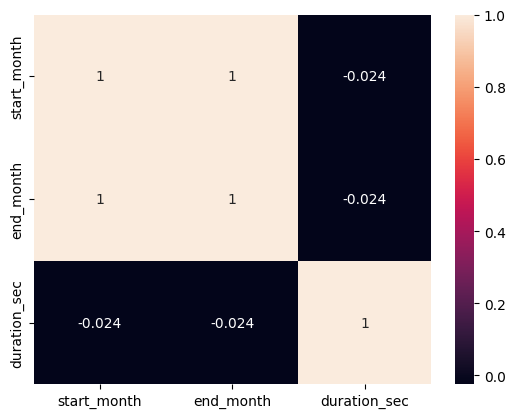

In [173]:
sns.heatmap(corr,annot=True)

In [16]:
#Q2
mat = np.arange(0,1,0.01)

In [20]:
mat.reshape(10,10)

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
       [0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
       [0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29],
       [0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49],
       [0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59],
       [0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69],
       [0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79],
       [0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89],
       [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]])

In [22]:
arr = np.linspace(0,1,20)

In [23]:
arr

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [24]:
mat = np.arange(1,26).reshape(5,5)

In [25]:
mat

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [26]:
sum = mat.sum()

In [27]:
sum

325

In [30]:
col = mat.sum(axis=0)

In [31]:
col

array([55, 60, 65, 70, 75])

In [34]:
std = mat.std()

In [35]:
std

7.211102550927978

In [36]:
#Q3
import numpy as np
x = np.arange(0,100)
y = x*2
z = x**2

In [37]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [38]:
y

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])

In [40]:
z

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])

<Figure size 1000x1000 with 0 Axes>

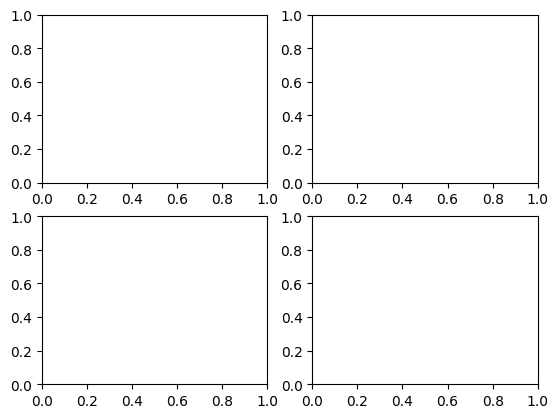

In [175]:
plt.figure(figsize=(10,10))
fig,ax= plt.subplots(2,2)
ax[]

In [24]:
#Q4
pur = pd.read_csv('walmart_purchase_data.csv')

In [25]:
pur.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73


In [26]:
pur.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [27]:
avg = pur['Purchase Price'].mean()

In [28]:
print("{:.2f}".format(avg))

50.35


In [29]:
pur['Purchase Price'].min()

0.0

In [30]:
pur['Purchase Price'].max()

99.99

In [37]:
pur.set_index('Email')

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Job,IP Address,Language,Purchase Price
Email,,,,,,,,,,,,,
pdunlap@yahoo.com,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,"Scientist, product/process development",149.146.147.205,el,98.14
anthony41@reed.com,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,Drilling engineer,15.160.41.51,fr,70.73
amymiller@morales-harrison.com,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,Customer service manager,132.207.160.22,de,0.95
brent16@olson-robinson.info,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,Drilling engineer,30.250.74.19,es,78.04
christopherwright@gmail.com,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,Fine artist,24.140.33.94,es,77.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
iscott@wade-garner.com,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,Printmaker,29.73.197.114,it,82.21
mary85@hotmail.com,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,Energy engineer,121.133.168.51,pt,25.63
tyler16@gmail.com,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,Veterinary surgeon,156.210.0.254,el,83.98


In [38]:
pur.set_index('Email').iloc[pur.set_index('Email')]

IndexError: DataFrame indexer is not allowed for .iloc
Consider using .loc for automatic alignment.